# Load the data, Importing Excel Files

In [658]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from pyod.models.knn import KNN
from sklearn.preprocessing import StandardScaler
import statsmodels as sm
from string import ascii_letters
import scipy.stats

In [659]:
Covid = pd.read_excel('Data/SPSSCOVIDdataSep17.xlsx')

In [660]:
Covid["Disfear"]

0      5
1      3
2      7
3      6
4      6
5      6
6      1
7      5
8      6
9      5
10     4
11     2
12     7
13     7
14     5
15     5
16     4
17     2
18     5
19     4
20     1
21     2
22     7
23     5
24     3
25     5
26     6
27     5
28     2
29     7
30     4
31     6
32     2
33     5
34     6
35     3
36     3
37     4
38     4
39     6
40     6
41     6
42     7
43     7
44     3
45     1
46     5
47     5
48     2
49     3
50     4
51     3
52     6
53     4
54     5
55     5
56     3
57     4
58     6
59     2
60     2
61     5
62     6
63     6
64     7
65     2
66     5
67     4
68     7
69     4
70     7
71     2
72     4
73     2
74     1
75     7
76     7
77     4
78     5
79     2
80     7
81     4
82     7
83     4
84     5
85     4
86     1
87     1
88     4
89     6
90     6
91     6
92     3
93     5
94     7
95     4
96     3
97     5
98     7
99     4
100    7
101    5
102    5
103    6
104    1
105    7
106    1
107    2
108    6
109    3
110    4
1

# Some basic analysis

In [409]:
Covid.head() # the first few rows

,Disfear,Dissuspi,DisBritgainst,Disoppdeny,Disunequal,Disbias,Disdeny,Distreatdiff,Disuncomf,Disjoke,Disphyass,Dissupport,Disasianlook,Disotherinsul,KnowReportUni,KnowReportpolice,Reportuni,Reportpoli,Coviddis,SocCap140,GenDis151,GenDis152,GenDis153,GenDis154,GenDis155,...,UniRecom,UniSupport_satisfaction,age,StudorGra,ukstay,liveukjan20,gender,ethnicity,otherethnicity,citizenship,religion,religwhen,oftenrelig,degree,university,studyarea,programleng,famiUK,edu,worktime,workplace,studfund,live,wholive,SES
0,5,3,4,2,4,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,6,1,1,2,3,4,...,7.0,5.0,22,1.0,6.0,3.0,2,1,NaN,1,7.0,NaN,NaN,2,86.0,1,1,2,2,1,NaN,1,3,6,8
1,3,4,4,4,5,4,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,7,2,2,2,3,2,...,5.0,4.0,18,1.0,3.0,3.0,2,4,NaN,1,7.0,NaN,NaN,1,4.0,4,4,2,2,1,NaN,1,3,4,8
2,7,7,6,6,6,5,7,7,7.0,4.0,1.0,1.0,3.0,7.0,NaN,NaN,NaN,NaN,1,5,5,5,2,6,1,...,2.0,3.0,24,2.0,3.0,1.0,2,1,NaN,1,7.0,NaN,NaN,2,NaN,1,1,2,2,1,NaN,1,1,2,6
3,6,6,4,4,4,5,4,6,3.0,2.0,1.0,3.0,2.0,5.0,NaN,NaN,NaN,NaN,2,4,2,2,3,3,2,...,7.0,6.0,25,2.0,3.0,1.0,2,1,NaN,1,9.0,NaN,NaN,2,86.0,10,1,2,2,1,NaN,1,3,3,6
4,6,6,6,6,4,5,6,6,5.0,3.0,1.0,2.0,3.0,4.0,NaN,NaN,NaN,NaN,1,4,5,5,5,5,4,...,4.0,5.0,28,1.0,3.0,5.0,1,1,NaN,1,7.0,NaN,NaN,2,NaN,1,1,2,2,8,3.0,6,4,8,7


In [ ]:
Covid.info() # show the data types and non-null value counts. 

Check the data columns type

In [ ]:
Covid.dtypes

In [ ]:
Covid.describe() #summary statistics for all numeric data in the data frame

In [ ]:
Covid.head()

Set the index for the data frame using the age column.

Index is like an address, that's how any data point across the dataframe or series can be accessed. Rows and columns both have indexes, rows indices are called as index and for columns its general column names. Pandas have three data structures dataframe, series & panel.

In [ ]:
Covid.age.count() # 158 valid values for age

In [ ]:
Covid.age.nunique() # 20 unique values

In [ ]:
#Covid.set_index('age', inplace=True) # When the data is indexed according to the 
#variable e.g. age

In [480]:
Covid.head()

,Disfear,Dissuspi,DisBritgainst,Disoppdeny,Disunequal,Disbias,Disdeny,Distreatdiff,Disuncomf,Disjoke,Disphyass,Dissupport,Disasianlook,Disotherinsul,KnowReportUni,KnowReportpolice,Reportuni,Reportpoli,Coviddis,SocCap140,GenDis151,GenDis152,GenDis153,GenDis154,GenDis155,...,UniRecom,UniSupport_satisfaction,age,StudorGra,ukstay,liveukjan20,gender,ethnicity,otherethnicity,citizenship,religion,religwhen,oftenrelig,degree,university,studyarea,programleng,famiUK,edu,worktime,workplace,studfund,live,wholive,SES
0,5,3,4,2,4,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,6,1,1,2,3,4,...,7.0,5.0,22,1.0,6.0,3.0,2,1,NaN,1,7.0,NaN,NaN,2,86.0,1,1,2,2,1,NaN,1,3,6,8
1,3,4,4,4,5,4,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,7,2,2,2,3,2,...,5.0,4.0,18,1.0,3.0,3.0,2,4,NaN,1,7.0,NaN,NaN,1,4.0,4,4,2,2,1,NaN,1,3,4,8
2,7,7,6,6,6,5,7,7,7.0,4.0,1.0,1.0,3.0,7.0,NaN,NaN,NaN,NaN,1,5,5,5,2,6,1,...,2.0,3.0,24,2.0,3.0,1.0,2,1,NaN,1,7.0,NaN,NaN,2,NaN,1,1,2,2,1,NaN,1,1,2,6
3,6,6,4,4,4,5,4,6,3.0,2.0,1.0,3.0,2.0,5.0,NaN,NaN,NaN,NaN,2,4,2,2,3,3,2,...,7.0,6.0,25,2.0,3.0,1.0,2,1,NaN,1,9.0,NaN,NaN,2,86.0,10,1,2,2,1,NaN,1,3,3,6
4,6,6,6,6,4,5,6,6,5.0,3.0,1.0,2.0,3.0,4.0,NaN,NaN,NaN,NaN,1,4,5,5,5,5,4,...,4.0,5.0,28,1.0,3.0,5.0,1,1,NaN,1,7.0,NaN,NaN,2,NaN,1,1,2,2,8,3.0,6,4,8,7


In [437]:
Covid.loc[1]

Disfear                            3.0
Dissuspi                           4.0
DisBritgainst                      4.0
Disoppdeny                         4.0
Disunequal                         5.0
Disbias                            4.0
Disdeny                            4.0
Distreatdiff                       3.0
Disuncomf                          NaN
Disjoke                            NaN
Disphyass                          NaN
Dissupport                         NaN
Disasianlook                       NaN
Disotherinsul                      NaN
KnowReportUni                      NaN
KnowReportpolice                   NaN
Reportuni                          NaN
Reportpoli                         NaN
Coviddis                           2.0
SocCap140                          7.0
GenDis151                          2.0
GenDis152                          2.0
GenDis153                          2.0
GenDis154                          3.0
GenDis155                          2.0
UKprotCOV                

In [ ]:
Covid.age # atttribute access

In [ ]:
Covid['age'] # bracket notation

In [ ]:
Covid.age.count()

In [ ]:
Covid.index

In [ ]:
Covid.shape

In [ ]:
Covid.head(2).T  # Use transpose to show a bit more of the output

In [ ]:
Covid.sample(2, random_state=1).T # show a sample of a few rows of the Covid data

# Handling text and categorical attributes

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder() # Create an instance of OrdinalEncoder() class
housing_cat_encoded = ordinal_encoder.fit_transform(Covid)
housing_cat_encoded[:10]

# Using K-nearest neighbor to find outliers

Create a standardized data frame of the analysis columns

In [ ]:
standardizer = StandardScaler()

Run the KNN model and generate anomaly scores.
We create an arbitrary number of outliers by setting the contamination parameter to 0.1

In [ ]:
analysisvars = [ 'Disfear', 'Disunequal', 'Disbias', 'Disdeny', 'Disphyass', 'Dissupport', 'Disasianlook', 'Disotherinsul']

covidanalysis = Covid.loc[:, analysisvars].dropna()
covidanalysisstand = standardizer.fit_transform(covidanalysis.iloc[:, 1:])

In [ ]:
clf_name = 'KNN'
clf = KNN(contamination=0.1)
clf.fit(covidanalysisstand)
y_pred = clf.labels_
y_scores = clf.decision_scores_

Show the predictions from the model.

Create a data frame from the y_pred and y_scores Numpy arrays. Set the index to the covidanalysis data frame index so that we can easily combine it with that data frame later. Notice that the decision scores for outliers are all higher than those for the inliers (outlier = 0 ): 

In [ ]:
pred = pd.DataFrame(zip(y_pred, y_scores),columns=['outlier','scores'],index=covidanalysis.index)
pred

In [ ]:
pred.sample(10, random_state=1)
pred.outlier.value_counts()

In [ ]:
pred.outlier.value_counts()

In [ ]:
pred.groupby(['outlier'])[['scores']].agg(['min','median','max'])

In [ ]:
pred.dtypes

Show the Covid data for the outliers.
Merge the covidanalysis and pred data frames. 
.join() function call.
.loc[ ] attribute access, return data from dataframe.
. sort_values is a function call.

In [ ]:
covidanalysis.join(pred).loc[pred.outlier==1,['Disfear', 'Disunequal', 'Disbias', 'Disdeny', 'Disphyass', 'Dissupport', 'Disasianlook', 'Disotherinsul']].sort_values(['Disphyass'], ascending=False)

# Explore the dataset visually

array([[<AxesSubplot:title={'center':'Disfear'}>,
        <AxesSubplot:title={'center':'Disunequal'}>,
        <AxesSubplot:title={'center':'Disbias'}>],
       [<AxesSubplot:title={'center':'Disdeny'}>,
        <AxesSubplot:title={'center':'Disphyass'}>,
        <AxesSubplot:title={'center':'Dissupport'}>],
       [<AxesSubplot:title={'center':'Disasianlook'}>,
        <AxesSubplot:title={'center':'Disotherinsul'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'SES'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

Text(0.5, 0, 'Totally disagree - Totally agree')

Text(0, 0.5, 'frequencies')

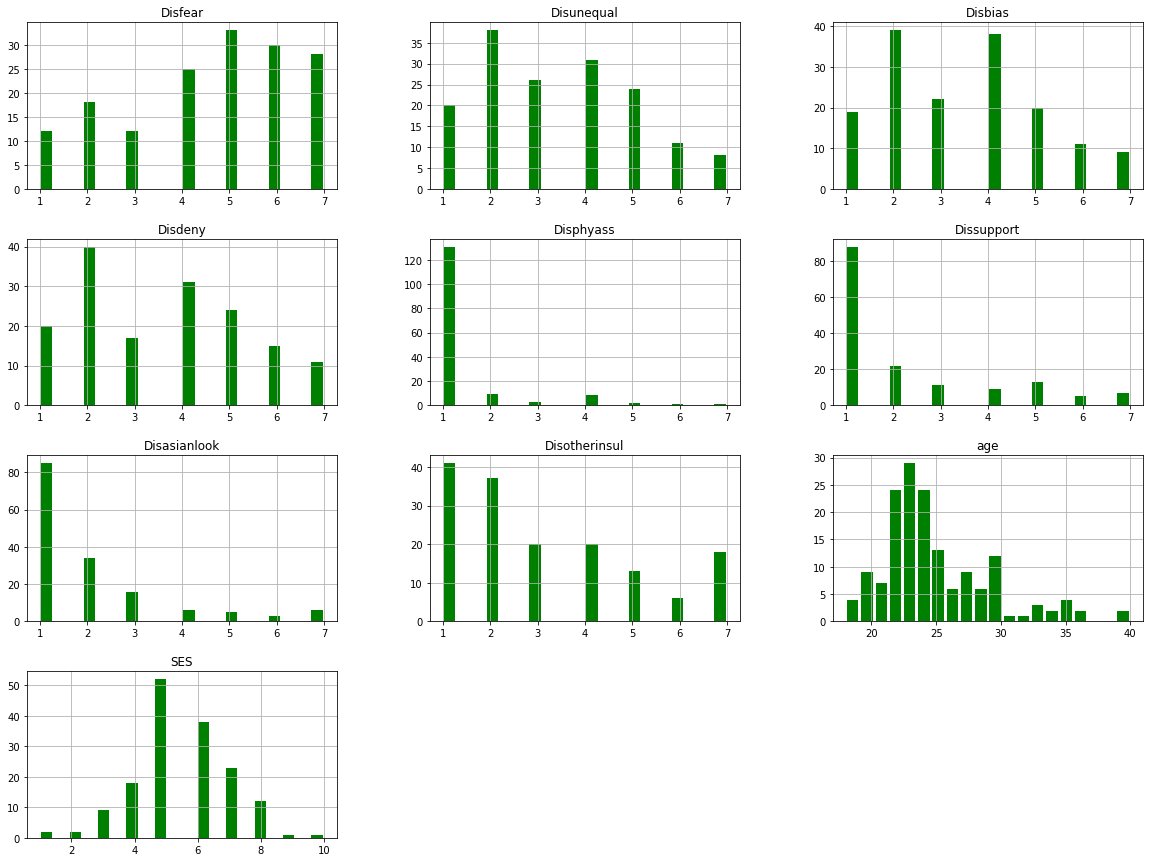

In [443]:
analysisvars = [ 'Disfear', 'Disunequal', 'Disbias', 'Disdeny', 'Disphyass', 'Dissupport', 'Disasianlook', 'Disotherinsul', 'age', 'SES']

# setting the ranges and no. of intervals
range = (0, 100)
bins = 10 
 
# plotting a histogram. figsize= (y-width,x-width)  bins = smaller the bars wider. rwidth the gap between bars.
Covid.hist(analysisvars, color = 'green', histtype = 'bar', rwidth = 0.8, bins=20, figsize = (20,15))

# x-axis label
plt.xlabel('Totally disagree - Totally agree')

# frequency label
plt.ylabel('frequencies')

# plot title
#plt.title('My histogram')
 
# function to show the plot
plt.show()

<AxesSubplot:xlabel='UniRecom', ylabel='Disasianlook'>

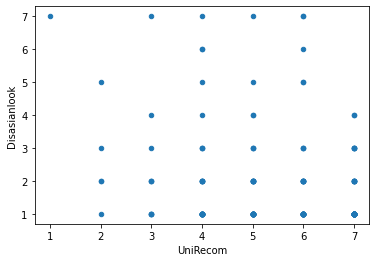

In [444]:
covid.plot(kind="scatter", x="UniRecom", y="Disasianlook")

In [446]:
sns.set_theme(style="ticks", color_codes=True)

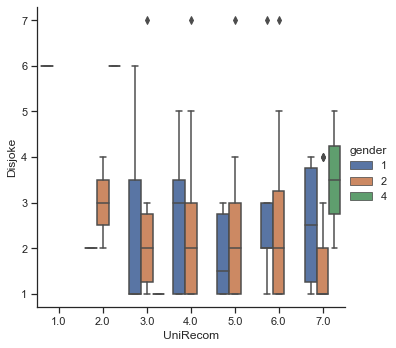

In [449]:
sns.catplot(x="UniRecom", y="Disjoke", hue="gender", kind="box", data=covid)

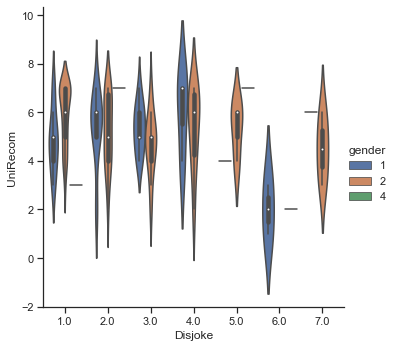

In [453]:
sns.catplot(x="Disjoke", y= "UniRecom", hue="gender",
            kind="violin", split=False, data=covid)

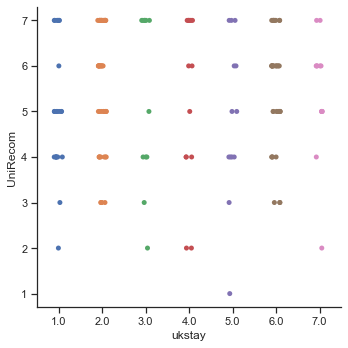

In [458]:
sns.catplot(x="ukstay", y="UniRecom",data=covid)

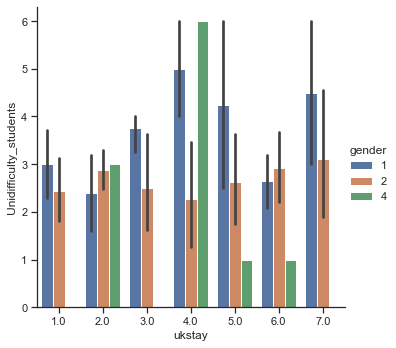

In [459]:
sns.catplot(x="ukstay", y="Unidifficulty_students", hue="gender", kind="bar", data=covid)

In [539]:
covid_cat = covid.select_dtypes(include="object").columns
covid_int = covid.select_dtypes(exclude="object").columns

# Pandas Index.tolist() function return a list of the values. These are each a scalar type, which is a Python scalar 
# (for str, int, float) or a pandas scalar (for Timestamp/Timedelta/Interval/Period).

new = covid_cat.tolist() + covid_int.tolist() 

covid.reindex(columns=new)


,Disfear,Dissuspi,DisBritgainst,Disoppdeny,Disunequal,Disbias,Disdeny,Distreatdiff,Disuncomf,Disjoke,Disphyass,Dissupport,Disasianlook,Disotherinsul,KnowReportUni,KnowReportpolice,Reportuni,Reportpoli,Coviddis,SocCap140,GenDis151,GenDis152,GenDis153,GenDis154,GenDis155,...,SupportAAHC_Police,SupportAAHC_BrtIntstudent,SupportAAHC_Asianstudent,UniSatisfaction,UniRecom,UniSupport_satisfaction,age,StudorGra,ukstay,liveukjan20,gender,ethnicity,citizenship,religion,degree,university,studyarea,programleng,famiUK,edu,worktime,studfund,live,wholive,SES
0,5,3,4,2,4,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,6,1,1,2,3,4,...,5.0,4.0,6.0,6.0,7.0,5.0,22,1.0,6.0,3.0,2,1,1,7.0,2,86.0,1,1,2,2,1,1,3,6,8
1,3,4,4,4,5,4,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,7,2,2,2,3,2,...,4.0,4.0,4.0,6.0,5.0,4.0,18,1.0,3.0,3.0,2,4,1,7.0,1,4.0,4,4,2,2,1,1,3,4,8
2,7,7,6,6,6,5,7,7,7.0,4.0,1.0,1.0,3.0,7.0,NaN,NaN,NaN,NaN,1,5,5,5,2,6,1,...,4.0,6.0,6.0,3.0,2.0,3.0,24,2.0,3.0,1.0,2,1,1,7.0,2,NaN,1,1,2,2,1,1,1,2,6
3,6,6,4,4,4,5,4,6,3.0,2.0,1.0,3.0,2.0,5.0,NaN,NaN,NaN,NaN,2,4,2,2,3,3,2,...,3.0,3.0,3.0,6.0,7.0,6.0,25,2.0,3.0,1.0,2,1,1,9.0,2,86.0,10,1,2,2,1,1,3,3,6
4,6,6,6,6,4,5,6,6,5.0,3.0,1.0,2.0,3.0,4.0,NaN,NaN,NaN,NaN,1,4,5,5,5,5,4,...,3.0,3.0,6.0,2.0,4.0,5.0,28,1.0,3.0,5.0,1,1,1,7.0,2,NaN,1,1,2,2,8,6,4,8,7
5,6,6,4,4,4,4,5,4,5.0,1.0,1.0,3.0,1.0,2.0,NaN,NaN,NaN,NaN,2,1,4,4,5,6,3,...,5.0,4.0,5.0,5.0,5.0,5.0,23,1.0,2.0,2.0,2,1,1,7.0,2,17.0,1,1,2,2,1,1,3,1,6
6,1,1,1,4,1,1,2,1,1.0,1.0,1.0,1.0,1.0,4.0,NaN,NaN,NaN,NaN,2,6,1,1,7,7,3,...,3.0,3.0,4.0,4.0,7.0,6.0,22,1.0,2.0,2.0,1,1,1,7.0,2,80.0,8,1,2,2,1,1,3,8,5
7,5,3,6,4,3,5,3,6,2.0,3.0,1.0,4.0,1.0,2.0,NaN,NaN,NaN,NaN,1,7,3,5,4,5,2,...,4.0,4.0,6.0,5.0,5.0,5.0,19,1.0,6.0,3.0,1,1,1,2.0,1,86.0,6,3,2,1,1,1,4,9,7
8,6,6,5,4,4,4,4,4,3.0,3.0,1.0,3.0,2.0,3.0,NaN,NaN,NaN,NaN,2,5,3,4,4,4,3,...,4.0,4.0,5.0,4.0,3.0,4.0,24,1.0,5.0,4.0,2,1,1,8.0,2,NaN,15,1,2,2,1,5,3,3,5
9,5,6,7,4,3,3,2,5,4.0,1.0,1.0,1.0,1.0,4.0,NaN,NaN,NaN,NaN,1,5,2,3,3,5,1,...,4.0,6.0,7.0,6.0,7.0,6.0,22,1.0,6.0,3.0,2,1,1,7.0,2,108.0,1,1,2,2,1,1,3,1,8


# Column selection

In [ ]:
#covid['Disfear'] # dict-like notation access of a column
#covid.Disfear # Attribute-like access and tab completion. 
#covid.columns

# select two columns and all rows
covid[['age', 'gender']]

# select all rows 
# and second to fourth column
covid[covid.columns[1:4]]

# Use loc[] 

# select three rows and two columns
covid.loc[1:3, ['age', 'gender']]

# .loc DataFrame method
# filtering rows and selecting columns by label format
# df.loc[rows, columns]
# row 1, all columns
covid.loc[0, :]

# select from disfear to all columns
covid.loc['Disfear':]

#Using iloc[]

# Remember that Python does not slice inclusive of the ending index.
# select all rows select first two column
covid.iloc[:, 0:2] 

# iloc[row slicing, column slicing]
covid.iloc[0:2, 1:3]

#Using .ix. Select all or some columns, one to another using .ix.

# select all rows and 0 to 2 columns 
print(covid.ix[:, 0:2])

# Correlation
First, select the columns you want to do the correlation

In [ ]:
# select all rows, 1-14 columns
x = covid.iloc[:,0:14]
x.reindex()

In [650]:
# select columns and all rows
y = covid[['UniSatisfaction','UniRecom','UniSupport_satisfaction','UniSatis_ethnicequal']]
y.reindex()
y.corr(method='spearman')

,UniSatisfaction,UniRecom,UniSupport_satisfaction,UniSatis_ethnicequal
0,6.0,7.0,5.0,7.0
1,6.0,5.0,4.0,5.0
2,3.0,2.0,3.0,3.0
3,6.0,7.0,6.0,5.0
4,2.0,4.0,5.0,6.0
5,5.0,5.0,5.0,5.0
6,4.0,7.0,6.0,6.0
7,5.0,5.0,5.0,1.0
8,4.0,3.0,4.0,4.0
9,6.0,7.0,6.0,6.0


,UniSatisfaction,UniRecom,UniSupport_satisfaction,UniSatis_ethnicequal
UniSatisfaction,1.000000,0.703118,0.615028,0.302703
UniRecom,0.703118,1.000000,0.709240,0.342685
UniSupport_satisfaction,0.615028,0.709240,1.000000,0.293980
UniSatis_ethnicequal,0.302703,0.342685,0.293980,1.000000


pd.concat(
    objs,
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)
objs : a sequence or mapping of Series or DataFrame objects. If a dict is passed, the sorted keys will be used as the keys argument, unless it is passed, in which case the values will be selected (see below). Any None objects will be dropped silently unless they are all None in which case a ValueError will be raised.

axis : {0, 1, …}, default 0 (0 dimension which is row), 1 dimension is the column. The axis to concatenate along.

join : {‘inner’, ‘outer’}, default ‘outer’. How to handle indexes on other axis(es). Outer for union and inner for intersection.

ignore_index : boolean, default False. If True, do not use the index values on the concatenation axis. The resulting axis will be labeled 0, …, n - 1. This is useful if you are concatenating objects where the concatenation axis does not have meaningful indexing information. Note the index values on the other axes are still respected in the join.

keys : sequence, default None. Construct hierarchical index using the passed keys as the outermost level. If multiple levels passed, should contain tuples.

levels : list of sequences, default None. Specific levels (unique values) to use for constructing a MultiIndex. Otherwise they will be inferred from the keys.

names : list, default None. Names for the levels in the resulting hierarchical index.

verify_integrity : boolean, default False. Check whether the new concatenated axis contains duplicates. This can be very expensive relative to the actual data concatenation.

copy : boolean, default True. If False, do not copy data unnecessarily.

In [631]:
# pd.concat([df1, df4.reindex(df1.index)], axis=1)


xy = pd.concat([x,y], axis = 1)
xy

#result = x.append(y, sort=False)
#result

#result = pd.merge(x, y)
#result

,Disfear,Dissuspi,DisBritgainst,Disoppdeny,Disunequal,Disbias,Disdeny,Distreatdiff,Disuncomf,Disjoke,Disphyass,Dissupport,Disasianlook,Disotherinsul,UniSatisfaction,UniRecom,UniSupport_satisfaction,UniSatis_ethnicequal
0,5,3,4,2,4,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,5.0,7.0
1,3,4,4,4,5,4,4,3,NaN,NaN,NaN,NaN,NaN,NaN,6.0,5.0,4.0,5.0
2,7,7,6,6,6,5,7,7,7.0,4.0,1.0,1.0,3.0,7.0,3.0,2.0,3.0,3.0
3,6,6,4,4,4,5,4,6,3.0,2.0,1.0,3.0,2.0,5.0,6.0,7.0,6.0,5.0
4,6,6,6,6,4,5,6,6,5.0,3.0,1.0,2.0,3.0,4.0,2.0,4.0,5.0,6.0
5,6,6,4,4,4,4,5,4,5.0,1.0,1.0,3.0,1.0,2.0,5.0,5.0,5.0,5.0
6,1,1,1,4,1,1,2,1,1.0,1.0,1.0,1.0,1.0,4.0,4.0,7.0,6.0,6.0
7,5,3,6,4,3,5,3,6,2.0,3.0,1.0,4.0,1.0,2.0,5.0,5.0,5.0,1.0
8,6,6,5,4,4,4,4,4,3.0,3.0,1.0,3.0,2.0,3.0,4.0,3.0,4.0,4.0
9,5,6,7,4,3,3,2,5,4.0,1.0,1.0,1.0,1.0,4.0,6.0,7.0,6.0,6.0


## Scipy spearman correlation

scipy.stats.spearmanr
scipy.stats.spearmanr(a, b=None, axis=0, nan_policy='propagate', alternative='two-sided')[source]

In [627]:
corr = scipy.stats.spearmanr(x, y,nan_policy='omit',)
corr

# Get the result separately
corr.correlation
corr.pvalue

rho, p = scipy.stats.spearmanr(x, y,nan_policy='omit',)

rho
p

SpearmanrResult(correlation=array([[ 1.        ,  0.57577958,  0.52425107,  0.32380031,  0.4116197 ,
         0.4725538 ,  0.37345149,  0.45382696,  0.40021072,  0.38775959,
         0.15687639,  0.2449788 ,  0.33302775,  0.39902085, -0.13361793,
        -0.06138966, -0.14271376, -0.08854278],
       [ 0.57577958,  1.        ,  0.56902108,  0.3239199 ,  0.4143779 ,
         0.48688485,  0.31263333,  0.43718234,  0.37390354,  0.35501101,
         0.23720408,  0.20787521,  0.38814306,  0.30193789, -0.04582828,
        -0.0367819 , -0.10854245, -0.11978647],
       [ 0.52425107,  0.56902108,  1.        ,  0.46811394,  0.6049485 ,
         0.61950559,  0.5159038 ,  0.66872553,  0.47028819,  0.44557189,
         0.17816137,  0.27054458,  0.41394634,  0.42124715, -0.15554432,
        -0.07494086, -0.15496683, -0.21660201],
       [ 0.32380031,  0.3239199 ,  0.46811394,  1.        ,  0.50229388,
         0.4542454 ,  0.61267274,  0.463206  ,  0.4559233 ,  0.42360589,
         0.21226913,  0.2

array([[ 1.        ,  0.57577958,  0.52425107,  0.32380031,  0.4116197 ,
         0.4725538 ,  0.37345149,  0.45382696,  0.40021072,  0.38775959,
         0.15687639,  0.2449788 ,  0.33302775,  0.39902085, -0.13361793,
        -0.06138966, -0.14271376, -0.08854278],
       [ 0.57577958,  1.        ,  0.56902108,  0.3239199 ,  0.4143779 ,
         0.48688485,  0.31263333,  0.43718234,  0.37390354,  0.35501101,
         0.23720408,  0.20787521,  0.38814306,  0.30193789, -0.04582828,
        -0.0367819 , -0.10854245, -0.11978647],
       [ 0.52425107,  0.56902108,  1.        ,  0.46811394,  0.6049485 ,
         0.61950559,  0.5159038 ,  0.66872553,  0.47028819,  0.44557189,
         0.17816137,  0.27054458,  0.41394634,  0.42124715, -0.15554432,
        -0.07494086, -0.15496683, -0.21660201],
       [ 0.32380031,  0.3239199 ,  0.46811394,  1.        ,  0.50229388,
         0.4542454 ,  0.61267274,  0.463206  ,  0.4559233 ,  0.42360589,
         0.21226913,  0.29439802,  0.38805081,  0.370

array([[0.00000000e+00, 2.48792068e-15, 1.55612461e-12, 3.32245209e-05,
        7.74334167e-08, 3.63570946e-10, 1.34518170e-06, 2.11601765e-09,
        2.47548792e-07, 6.19841826e-07, 5.12508696e-02, 2.12467934e-03,
        2.29462690e-05, 2.70684236e-07, 9.52485368e-02, 4.44995894e-01,
        7.45786649e-02, 2.96448184e-01],
       [2.48792068e-15, 0.00000000e+00, 6.17452885e-15, 3.29900115e-05,
        6.21110553e-08, 8.77413554e-11, 6.35426593e-05, 9.28277626e-09,
        1.64825020e-06, 5.82604721e-06, 2.96063913e-03, 9.44553690e-03,
        6.02901845e-07, 1.34443591e-04, 5.68720056e-01, 6.47421096e-01,
        1.76002520e-01, 1.57120211e-01],
       [1.55612461e-12, 6.17452885e-15, 0.00000000e+00, 5.57366464e-10,
        3.83071181e-17, 4.04879627e-18, 3.99847406e-12, 7.88466833e-22,
        6.64471283e-10, 6.25895069e-09, 2.65608360e-02, 6.62345826e-04,
        8.60262484e-08, 4.81007129e-08, 5.17453070e-02, 3.50915428e-01,
        5.26310598e-02, 9.88537258e-03],
       [3.322

array([[ 1.        ,  0.57577958,  0.52425107,  0.32380031,  0.4116197 ,
         0.4725538 ,  0.37345149,  0.45382696,  0.40021072,  0.38775959,
         0.15687639,  0.2449788 ,  0.33302775,  0.39902085, -0.13361793,
        -0.06138966, -0.14271376, -0.08854278],
       [ 0.57577958,  1.        ,  0.56902108,  0.3239199 ,  0.4143779 ,
         0.48688485,  0.31263333,  0.43718234,  0.37390354,  0.35501101,
         0.23720408,  0.20787521,  0.38814306,  0.30193789, -0.04582828,
        -0.0367819 , -0.10854245, -0.11978647],
       [ 0.52425107,  0.56902108,  1.        ,  0.46811394,  0.6049485 ,
         0.61950559,  0.5159038 ,  0.66872553,  0.47028819,  0.44557189,
         0.17816137,  0.27054458,  0.41394634,  0.42124715, -0.15554432,
        -0.07494086, -0.15496683, -0.21660201],
       [ 0.32380031,  0.3239199 ,  0.46811394,  1.        ,  0.50229388,
         0.4542454 ,  0.61267274,  0.463206  ,  0.4559233 ,  0.42360589,
         0.21226913,  0.29439802,  0.38805081,  0.370

array([[0.00000000e+00, 2.48792068e-15, 1.55612461e-12, 3.32245209e-05,
        7.74334167e-08, 3.63570946e-10, 1.34518170e-06, 2.11601765e-09,
        2.47548792e-07, 6.19841826e-07, 5.12508696e-02, 2.12467934e-03,
        2.29462690e-05, 2.70684236e-07, 9.52485368e-02, 4.44995894e-01,
        7.45786649e-02, 2.96448184e-01],
       [2.48792068e-15, 0.00000000e+00, 6.17452885e-15, 3.29900115e-05,
        6.21110553e-08, 8.77413554e-11, 6.35426593e-05, 9.28277626e-09,
        1.64825020e-06, 5.82604721e-06, 2.96063913e-03, 9.44553690e-03,
        6.02901845e-07, 1.34443591e-04, 5.68720056e-01, 6.47421096e-01,
        1.76002520e-01, 1.57120211e-01],
       [1.55612461e-12, 6.17452885e-15, 0.00000000e+00, 5.57366464e-10,
        3.83071181e-17, 4.04879627e-18, 3.99847406e-12, 7.88466833e-22,
        6.64471283e-10, 6.25895069e-09, 2.65608360e-02, 6.62345826e-04,
        8.60262484e-08, 4.81007129e-08, 5.17453070e-02, 3.50915428e-01,
        5.26310598e-02, 9.88537258e-03],
       [3.322

## Pandas correlation implementation

### pandas.DataFrame.corr
DataFrame.corr(method='pearson', min_periods=1)[source]
Compute pairwise correlation of columns, excluding NA/null values.

Parameters
method{‘pearson’, ‘kendall’, ‘spearman’} or callable
Method of correlation:

pearson : standard correlation coefficient

kendall : Kendall Tau correlation coefficient

spearman : Spearman rank correlation

callable: callable with input two 1d ndarrays
and returning a float. Note that the returned matrix from corr will have 1 along the diagonals and will be symmetric regardless of the callable’s behavior.

min_periodsint, optional
Minimum number of observations required per pair of columns to have a valid result. Currently only available for Pearson and Spearman correlation.

Returns
DataFrame
Correlation matrix.


### DataFrame.corrwith(other, axis=0, drop=False, method='pearson')[source]
Compute pairwise correlation.

Pairwise correlation is computed between rows or columns of DataFrame with rows or columns of Series or DataFrame. DataFrames are first aligned along both axes before computing the correlations.

Parameters
otherDataFrame, Series
Object with which to compute correlations.

axis{0 or ‘index’, 1 or ‘columns’}, default 0
The axis to use. 0 or ‘index’ to compute column-wise, 1 or ‘columns’ for row-wise.

dropbool, default False
Drop missing indices from result.

method{‘pearson’, ‘kendall’, ‘spearman’} or callable
Method of correlation:

pearson : standard correlation coefficient

kendall : Kendall Tau correlation coefficient

spearman : Spearman rank correlation

callable: callable with input two 1d ndarrays
and returning a float.

Returns
Series

In [632]:
xy.corr(method = 'spearman')

,Disfear,Dissuspi,DisBritgainst,Disoppdeny,Disunequal,Disbias,Disdeny,Distreatdiff,Disuncomf,Disjoke,Disphyass,Dissupport,Disasianlook,Disotherinsul,UniSatisfaction,UniRecom,UniSupport_satisfaction,UniSatis_ethnicequal
Disfear,1.000000,0.575780,0.524251,0.323800,0.411620,0.472554,0.373451,0.453827,0.400211,0.387760,0.156876,0.244979,0.333028,0.399021,-0.133618,-0.061390,-0.142714,-0.088543
Dissuspi,0.575780,1.000000,0.569021,0.323920,0.414378,0.486885,0.312633,0.437182,0.373904,0.355011,0.237204,0.207875,0.388143,0.301938,-0.045828,-0.036782,-0.108542,-0.119786
DisBritgainst,0.524251,0.569021,1.000000,0.468114,0.604948,0.619506,0.515904,0.668726,0.470288,0.445572,0.178161,0.270545,0.413946,0.421247,-0.155544,-0.074941,-0.154967,-0.216602
Disoppdeny,0.323800,0.323920,0.468114,1.000000,0.502294,0.454245,0.612673,0.463206,0.455923,0.423606,0.212269,0.294398,0.388051,0.370342,-0.177717,-0.061802,-0.174434,-0.167812
Disunequal,0.411620,0.414378,0.604948,0.502294,1.000000,0.859489,0.670632,0.801931,0.604782,0.579894,0.307405,0.381816,0.540088,0.458627,-0.279238,-0.243253,-0.356969,-0.282234
Disbias,0.472554,0.486885,0.619506,0.454245,0.859489,1.000000,0.698596,0.854282,0.617404,0.661263,0.326065,0.430645,0.558827,0.458865,-0.244499,-0.227120,-0.292178,-0.312977
Disdeny,0.373451,0.312633,0.515904,0.612673,0.670632,0.698596,1.000000,0.700801,0.490655,0.512582,0.256547,0.342251,0.449751,0.388983,-0.210276,-0.164124,-0.248581,-0.149285
Distreatdiff,0.453827,0.437182,0.668726,0.463206,0.801931,0.854282,0.700801,1.000000,0.610596,0.618382,0.275374,0.421361,0.549426,0.478714,-0.273144,-0.206602,-0.304176,-0.339395
Disuncomf,0.400211,0.373904,0.470288,0.455923,0.604782,0.617404,0.490655,0.610596,1.000000,0.630169,0.357519,0.487561,0.560694,0.417362,-0.242104,-0.146491,-0.273822,-0.085952
Disjoke,0.387760,0.355011,0.445572,0.423606,0.579894,0.661263,0.512582,0.618382,0.630169,1.000000,0.506618,0.567594,0.751604,0.533923,-0.286438,-0.200393,-0.283602,-0.130151


In [604]:
covid.corr(method='spearman', min_periods=1).UniRecom


Disfear                          -0.061390
Dissuspi                         -0.036782
DisBritgainst                    -0.074941
Disoppdeny                       -0.061802
Disunequal                       -0.243253
Disbias                          -0.227120
Disdeny                          -0.164124
Distreatdiff                     -0.206602
Disuncomf                        -0.146491
Disjoke                          -0.200393
Disphyass                        -0.103647
Dissupport                       -0.207385
Disasianlook                     -0.207509
Disotherinsul                    -0.131242
KnowReportUni                     0.199900
KnowReportpolice                  0.087324
Reportuni                         0.067088
Reportpoli                        0.084958
Coviddis                          0.101386
SocCap140                         0.129487
GenDis151                        -0.253972
GenDis152                        -0.150848
GenDis153                         0.145748
GenDis154  

In [634]:
covid.corr(method='spearman')[0:10]

covid.columns

covid.columns.get_loc("UniRecom")

#covid.iloc[0:10,0:3]     #iloc[from which row to which row, from which column to]
#covid.iloc[0:1,-2]
#covid.iloc[0:10]['UniRecom']

,Disfear,Dissuspi,DisBritgainst,Disoppdeny,Disunequal,Disbias,Disdeny,Distreatdiff,Disuncomf,Disjoke,Disphyass,Dissupport,Disasianlook,Disotherinsul,KnowReportUni,KnowReportpolice,Reportuni,Reportpoli,Coviddis,SocCap140,GenDis151,GenDis152,GenDis153,GenDis154,GenDis155,...,SupportAAHC_Police,SupportAAHC_BrtIntstudent,SupportAAHC_Asianstudent,UniSatisfaction,UniRecom,UniSupport_satisfaction,age,StudorGra,ukstay,liveukjan20,gender,ethnicity,citizenship,religion,degree,university,studyarea,programleng,famiUK,edu,worktime,studfund,live,wholive,SES
Disfear,1.000000,0.575780,0.524251,0.323800,0.411620,0.472554,0.373451,0.453827,0.400211,0.387760,0.156876,0.244979,0.333028,0.399021,0.077049,0.107625,-0.255580,-0.301443,-0.232713,-0.286789,0.362095,0.432699,-0.215648,0.161957,-0.196993,...,-0.067746,0.005936,0.059401,-0.133618,-0.061390,-0.142714,0.036342,-0.014456,0.023807,-0.054857,0.032626,0.028756,0.067914,0.113346,0.044195,0.005979,0.016296,0.013563,-0.043374,-0.011640,-0.031610,0.051647,0.101949,-0.081169,0.160227
Dissuspi,0.575780,1.000000,0.569021,0.323920,0.414378,0.486885,0.312633,0.437182,0.373904,0.355011,0.237204,0.207875,0.388143,0.301938,0.183656,0.270106,-0.208994,-0.256672,-0.224472,-0.150768,0.343461,0.391710,-0.100383,0.171216,-0.059362,...,-0.024992,0.061369,0.036368,-0.045828,-0.036782,-0.108542,0.039347,0.255115,0.175576,0.128617,-0.041100,0.036383,0.135774,0.089731,0.034101,-0.082498,-0.044668,0.096312,-0.170687,-0.022512,0.000077,0.113784,-0.057310,-0.079644,0.131059
DisBritgainst,0.524251,0.569021,1.000000,0.468114,0.604948,0.619506,0.515904,0.668726,0.470288,0.445572,0.178161,0.270545,0.413946,0.421247,0.027377,0.169760,-0.253808,-0.286738,-0.428218,-0.062885,0.501011,0.552711,-0.303175,0.278971,-0.322533,...,-0.190010,-0.128318,0.010728,-0.155544,-0.074941,-0.154967,-0.046447,0.133276,0.132287,0.141066,-0.001169,-0.101586,0.059558,0.013697,0.014538,-0.006530,-0.068088,0.018688,-0.046544,-0.086400,-0.069820,0.071453,0.025340,0.036409,0.111724
Disoppdeny,0.323800,0.323920,0.468114,1.000000,0.502294,0.454245,0.612673,0.463206,0.455923,0.423606,0.212269,0.294398,0.388051,0.370342,-0.038776,0.109207,-0.234434,-0.261956,-0.336792,-0.157729,0.463568,0.482670,-0.201715,0.254849,-0.091020,...,-0.072419,-0.089433,0.005152,-0.177717,-0.061802,-0.174434,0.116056,0.010262,-0.020030,-0.010124,0.049751,-0.047457,-0.077949,0.044505,0.122867,-0.041274,-0.026786,0.004009,0.054568,0.087677,-0.026182,0.054644,0.014446,-0.068753,-0.131271
Disunequal,0.411620,0.414378,0.604948,0.502294,1.000000,0.859489,0.670632,0.801931,0.604782,0.579894,0.307405,0.381816,0.540088,0.458627,-0.009536,0.129220,-0.481218,-0.490923,-0.491252,-0.189790,0.486062,0.661874,-0.304844,0.185523,-0.166281,...,-0.211881,-0.162489,-0.016209,-0.279238,-0.243253,-0.356969,0.083309,0.106208,0.192659,0.121541,0.002800,-0.009444,0.104629,0.125833,0.142422,-0.112114,-0.022099,0.134010,-0.074188,0.091139,0.047119,0.158681,-0.076460,-0.053697,0.088139
Disbias,0.472554,0.486885,0.619506,0.454245,0.859489,1.000000,0.698596,0.854282,0.617404,0.661263,0.326065,0.430645,0.558827,0.458865,0.062006,0.177609,-0.447274,-0.466600,-0.556339,-0.176309,0.608732,0.729969,-0.260162,0.208099,-0.154664,...,-0.197776,-0.141025,-0.016626,-0.244499,-0.227120,-0.292178,0.060372,0.144247,0.191105,0.124827,-0.122423,0.003221,0.073402,0.041852,0.055737,-0.095964,-0.007668,0.185453,-0.090305,0.035762,0.079862,0.151916,-0.089543,-0.057080,0.137107
Disdeny,0.373451,0.312633,0.515904,0.612673,0.670632,0.698596,1.000000,0.700801,0.490655,0.512582,0.256547,0.342251,0.449751,0.388983,0.116047,0.156223,-0.250108,-0.290473,-0.381519,-0.196565,0.514802,0.541701,-0.269796,0.286511,-0.151002,...,-0.098370,-0.114542,0.008249,-0.210276,-0.164124,-0.248581,0.129468,0.083593,0.058562,0.052574,-0.024996,-0.011900,0.014108,0.069777,0.145525,-0.186147,0.010314,0.070056,0.010467,0.079547,0.035208,0.138917,-0.038430,-0.072020,0.024304
Distreatdiff,0.453827,0.437182,0.668726,0.463206,0.801931,0.854282,0.700801,1

Index(['Disfear', 'Dissuspi', 'DisBritgainst',
       'Disoppdeny', 'Disunequal', 'Disbias',
       'Disdeny', 'Distreatdiff', 'Disuncomf',
       'Disjoke',
       ...
       'university', 'studyarea', 'programleng',
       'famiUK', 'edu', 'worktime', 'studfund',
       'live', 'wholive', 'SES'],
      dtype='object', length=199)

178

# Seaborn heatmap

seaborn.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the currently-active Axes if none is provided to the ax argument. Part of this Axes space will be taken and used to plot a colormap, unless cbar is False or a separate Axes is provided to cbar_ax.

Parameters
datarectangular dataset
2D dataset that can be coerced into an ndarray. If a Pandas DataFrame is provided, the index/column information will be used to label the columns and rows.

vmin, vmaxfloats, optional
Values to anchor the colormap, otherwise they are inferred from the data and other keyword arguments.

cmapmatplotlib colormap name or object, or list of colors, optional
The mapping from data values to color space. If not provided, the default will depend on whether center is set.

centerfloat, optional
The value at which to center the colormap when plotting divergant data. Using this parameter will change the default cmap if none is specified.

robustbool, optional
If True and vmin or vmax are absent, the colormap range is computed with robust quantiles instead of the extreme values.

annotbool or rectangular dataset, optional
If True, write the data value in each cell. If an array-like with the same shape as data, then use this to annotate the heatmap instead of the data. Note that DataFrames will match on position, not index.

fmtstr, optional
String formatting code to use when adding annotations.

annot_kwsdict of key, value mappings, optional
Keyword arguments for matplotlib.axes.Axes.text() when annot is True.

linewidthsfloat, optional
Width of the lines that will divide each cell.

linecolorcolor, optional
Color of the lines that will divide each cell.

cbarbool, optional
Whether to draw a colorbar.

cbar_kwsdict of key, value mappings, optional
Keyword arguments for matplotlib.figure.Figure.colorbar().

cbar_axmatplotlib Axes, optional
Axes in which to draw the colorbar, otherwise take space from the main Axes.

squarebool, optional
If True, set the Axes aspect to “equal” so each cell will be square-shaped.

xticklabels, yticklabels“auto”, bool, list-like, or int, optional
If True, plot the column names of the dataframe. If False, don’t plot the column names. If list-like, plot these alternate labels as the xticklabels. If an integer, use the column names but plot only every n label. If “auto”, try to densely plot non-overlapping labels.

maskbool array or DataFrame, optional
If passed, data will not be shown in cells where mask is True. Cells with missing values are automatically masked.

axmatplotlib Axes, optional
Axes in which to draw the plot, otherwise use the currently-active Axes.

kwargsother keyword arguments
All other keyword arguments are passed to matplotlib.axes.Axes.pcolormesh().

Returns
axmatplotlib Axes
Axes object with the heatmap.

seaborn.diverging_palette(h_neg, h_pos, s=75, l=50, sep=1, n=6, center='light', as_cmap=False)
Make a diverging palette between two HUSL colors.

If you are using the IPython notebook, you can also choose this palette interactively with the choose_diverging_palette() function.

Parameters
h_neg, h_posfloat in [0, 359]
Anchor hues for negative and positive extents of the map.

sfloat in [0, 100], optional
Anchor saturation for both extents of the map.

lfloat in [0, 100], optional
Anchor lightness for both extents of the map.

sepint, optional
Size of the intermediate region.

nint, optional
Number of colors in the palette (if not returning a cmap)

center{“light”, “dark”}, optional
Whether the center of the palette is light or dark

as_cmapbool, optional
If True, return a matplotlib.colors.Colormap.

Returns
list of RGB tuples or matplotlib.colors.Colormap

numpy.triu
numpy.triu(m, k=0)[source]
Upper triangle of an array.

Return a copy of an array with the elements below the k-th diagonal zeroed.

Please refer to the documentation for tril for further details.

In [ ]:
numpy.ones_like(a, dtype=None, order='K', subok=True, shape=None)[source]
Return an array of ones with the same shape and type as a given array.

Parameters
aarray_like
The shape and data-type of a define these same attributes of the returned array.

dtypedata-type, optional
Overrides the data type of the result.

New in version 1.6.0.

order{‘C’, ‘F’, ‘A’, or ‘K’}, optional
Overrides the memory layout of the result. ‘C’ means C-order, ‘F’ means F-order, ‘A’ means ‘F’ if a is Fortran contiguous, ‘C’ otherwise. ‘K’ means match the layout of a as closely as possible.

New in version 1.6.0.

subokbool, optional.
If True, then the newly created array will use the sub-class type of a, otherwise it will be a base-class array. Defaults to True.

shapeint or sequence of ints, optional.
Overrides the shape of the result. If order=’K’ and the number of dimensions is unchanged, will try to keep order, otherwise, order=’C’ is implied.

New in version 1.17.0.

Returns
outndarray
Array of ones with the same shape and type as a.

<AxesSubplot:>

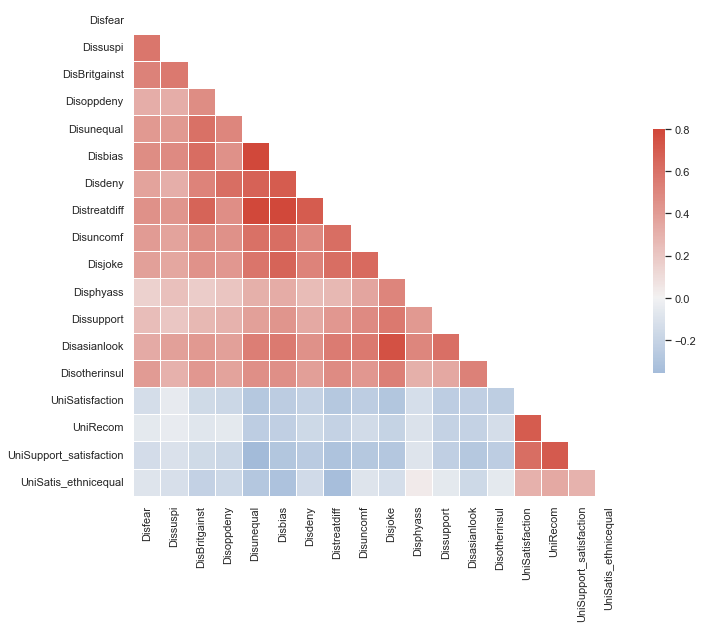

In [639]:
# Correlation heatmap

sns.set_theme(style="white")

# Generate a large random dataset
#rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)), columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = xy.corr(method = 'spearman', min_periods=1)


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 15, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio

# vmin, vmax:floats, optional
#Values to anchor the colormap, otherwise they are inferred from the data and other keyword arguments.

#center:float, optional
#The value at which to center the colormap when plotting divergant data. Using this parameter will change the default cmap if none is specified.

#square:bool, optional
#If True, set the Axes aspect to “equal” so each cell will be square-shaped.

#cbar_kwsdict of key, value mappings, optional
#Keyword arguments for matplotlib.figure.Figure.colorbar().

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,square=True,
            linewidths=.5, cbar_kws={"shrink": .5})

NameError: name 'x_to_num' is not defined

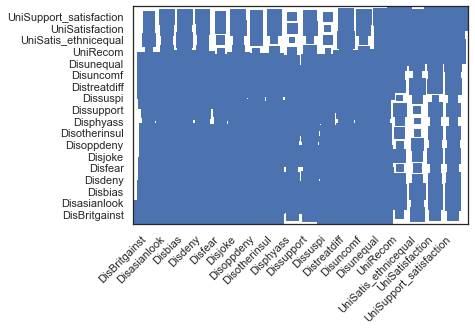

In [644]:
# Step 1 - Make a scatter plot with square markers, set column names as labels

def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 800
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    

corr = xy.corr(method = 'spearman', min_periods=1)
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

ax.grid(False, 'major')
ax.grid(True, 'minor')
ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])


n_colors = 256 # Use 256 colors for the diverging color palette
palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette
color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

def value_to_color(val):
    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]

ax.scatter(
    x=x.map(x_to_num),
    y=y.map(y_to_num),
    s=size * size_scale,
    c=color.apply(value_to_color), # Vector of square color values, mapped to color palette
    marker='s'
)

# Correlations

In [ ]:
# Ask jupyternotebook to display all results
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
pd.set_option("display.max_columns", 10)
#pd.set_option("display.height", 10)
pd.set_option("display.max_rows", 300)
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 50)

In [ ]:
corr_matrix = Covid.corr(method ='spearman')
corr_matrix

In [ ]:
# how much each atttribute correlates with the "Disjoke" variable
corr_1 = corr_matrix["Disjoke"].sort_values(ascending=False)
corr_1

# Identifying and cleaning missing data

## check data for missing values. 

In [ ]:
misscnt = Covid.isna().sum()
misscnt

In [ ]:
misscnt.value_counts().sort_index()

In [ ]:
for col_name in Covid.columns: 
    print(col_name)

In [ ]:
Covid.isnull().sum(axis = 0)

## Drop the columns with too many missing values

In [ ]:
covid = Covid.drop(["otherethnicity", "religwhen", "oftenrelig", "workplace"], axis = 1) #axis represents first row

covid

## Use dropna to drop some missing data rows

In [ ]:
covid_drop = Covid.dropna(thresh=2)

In [ ]:
covid_drop.shape

## Evaluating and cleaning string series data

In [376]:
Covid.Disuncomf.value_counts()

1.0    45
3.0    35
2.0    27
4.0    20
5.0    12
7.0    11
6.0     5
Name: Disuncomf, dtype: int64

In [377]:
 missing = np.where(Covid.Disuncomf.isnull())
missing

(array([ 0,  1, 60]),)

## Impute missing data 

In [ ]:
# Select missing data to be imputed
missinglist = ['Disuncomf', 'Disjoke', 'Disphyass', 'Dissupport', 'Disasianlook', 'Disotherinsul','UniSatis_classqua',
'UniSatis_advisor','UniSatis_financialaid', 'UniSatis_housing', 'UniSatis_healthfamily', 'UniSatis_safety', 'UniSatis_ethnicequal',
'Unidifficulty_language','Unidifficulty_expense','Unidifficulty_livingcost','Unidifficulty_faculty','Unidifficulty_students',
'Unidifficulty_makefriends','Unidifficulty_other','Equaltreat_Classmate','Equaltreat_Teach','Equaltreat_admin',
'SupportAAHC_Uni', 'SupportAAHC_Teach', 'SupportAAHC_Classmates', 'SupportAAHC_Police', 'SupportAAHC_BrtIntstudent',
'SupportAAHC_Asianstudent', 'UniSatisfaction', 'UniRecom', 'UniSupport_satisfaction',]

missinganalysis = Covid[missinglist]

missinganalysis


In [ ]:
from sklearn.impute import SimpleImputer


### KNN Imputer

example: 
>>> import numpy as np
>>> from sklearn.impute import KNNImputer
>>> X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
>>> imputer = KNNImputer(n_neighbors=2)
>>> imputer.fit_transform(X)
array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

#### Difference between Numpy array and pandas dataframe

The essential difference is the presence of the index: while the Numpy Array has an implicitly defined integer index used to access the values, the Pandas Series has an explicitly defined index associated with the values.

This explicit index definition gives the Series object additional capabilities. For example, the index need not be an integer, but can consist of values of any desired type. For example, if we wish, we can use strings as an index:

In [ ]:
covid = Covid.drop(["otherethnicity", "religwhen", "oftenrelig", "workplace"], axis = 1) #axis represents first row

covid

We can even use non-contiguous or non-sequential indices:

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data
data[5]

### ColumnTransformer

The ColumnTransformer is a class in the scikit-learn Python machine learning library that allows you to selectively apply data preparation transforms.

For example, it allows you to apply a specific transform or sequence of transforms to just the numerical columns, and a separate sequence of transforms to just the categorical columns.

To use the ColumnTransformer, you must specify a list of transformers.

Each transformer is a three-element tuple that defines the name of the transformer, the transform to apply, and the column indices to apply it to. For example:

(Name, Object, Columns)


In [ ]:
transformer = ColumnTransformer(transformers=[('cat', OneHotEncoder(), [0, 1])])

t = [('num', SimpleImputer(strategy='median'), [0, 1]), ('cat', SimpleImputer(strategy='most_frequent'), [2, 3])]
transformer = ColumnTransformer(transformers=t)

transformer = ColumnTransformer(transformers=[('cat', OneHotEncoder(), [2, 3])], remainder='passthrough')

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer

In [ ]:
import pandas as pd
import numpy as np
X_train = pd.DataFrame({'Default': [1,0,0,0,0,0,1],'Income': [250000,400000,'NAN',440000,500000,700000,800000],'Age': [20,30, 40,35,25,40,'NAN'],'Name':['Allen','Sara','Lily','Rock','David','Rose','Mat'],'Gender':['M','F','F','M','M','F','M'],'Type of job': ['Skilled','Unskilled','Super skilled','Super skilled','NAN','Skilled','Skilled'],'Amt of credit':['NAN',30000,50000,80000,40000,100000,300000],'Years employed':[1,10,12,6,4,13,12]})
X_train=X_train.replace('NAN',np.NaN)


s = X_train.drop('Name', axis=1).select_dtypes(object).mode().iloc[0].append(X_train.median())

X_train = X_train.fillna(s)
print (X_train)

X_train=X_train.replace('NAN',np.NaN)

#removed column Name
X_train = X_train.drop('Name', axis=1)

#original order of columns
cols = X_train.columns
X_train_numeric=X_train.select_dtypes(include=['int', 'float']).columns

#joined columns numeric and non numeric
X_train_non_numeric=X_train.select_dtypes(exclude=['int', 'float']).columns
new = X_train_numeric.tolist() + X_train_non_numeric.tolist()

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

t = [('num', SimpleImputer(strategy='median'), X_train_numeric),
('cat', SimpleImputer(strategy='most_frequent'), X_train_non_numeric)]
transformer = ColumnTransformer(transformers=t, remainder='passthrough')
X_train = transformer.fit_transform(X_train) #numpy array

#DataFrame constructor with new columns names and added reindex for change by original order

X_train = pd.DataFrame(X_train, columns=new).reindex(cols, axis=1)
print (X_train)


In [ ]:
Covid.columns


In [651]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer

# Pandas DataFrame.columns attribute return the column labels of the given Dataframe.
cols = covid.columns 
print(cols)

covid_cat = covid.select_dtypes(include="object").columns
covid_int = covid.select_dtypes(exclude="object").columns

# Pandas Index.tolist() function return a list of the values. These are each a scalar type, which is a Python scalar 
# (for str, int, float) or a pandas scalar (for Timestamp/Timedelta/Interval/Period).

new = covid_cat.tolist() + covid_int.tolist() 

covid_int
covid_cat
print(new)

t = [('num',KNNImputer(n_neighbors=5), covid_int),
('cat', SimpleImputer(strategy='most_frequent'), covid_cat)]

transformer = ColumnTransformer(transformers=t, remainder='passthrough')

Covid_KNN1 = transformer.fit_transform(covid) #numpy array
Covid_KNN1


# DataFrame constructor with new columns names and added reindex for change by original order

covidimpu = pd.DataFrame(Covid_KNN1, columns=new).reindex(cols, axis=1)

covidimpu.head()


Index(['Disfear', 'Dissuspi', 'DisBritgainst',
       'Disoppdeny', 'Disunequal', 'Disbias',
       'Disdeny', 'Distreatdiff', 'Disuncomf',
       'Disjoke',
       ...
       'university', 'studyarea', 'programleng',
       'famiUK', 'edu', 'worktime', 'studfund',
       'live', 'wholive', 'SES'],
      dtype='object', length=199)


Index(['Disfear', 'Dissuspi', 'DisBritgainst',
       'Disoppdeny', 'Disunequal', 'Disbias',
       'Disdeny', 'Distreatdiff', 'Disuncomf',
       'Disjoke',
       ...
       'university', 'studyarea', 'programleng',
       'famiUK', 'edu', 'worktime', 'studfund',
       'live', 'wholive', 'SES'],
      dtype='object', length=199)

Index([], dtype='object')

['Disfear', 'Dissuspi', 'DisBritgainst', 'Disoppdeny', 'Disunequal', 'Disbias', 'Disdeny', 'Distreatdiff', 'Disuncomf', 'Disjoke', 'Disphyass', 'Dissupport', 'Disasianlook', 'Disotherinsul', 'KnowReportUni', 'KnowReportpolice', 'Reportuni', 'Reportpoli', 'Coviddis', 'SocCap140', 'GenDis151', 'GenDis152', 'GenDis153', 'GenDis154', 'GenDis155', 'UKprotCOV', 'Westpol', 'GenDis171', 'GenDis172', 'GenDis173', 'GenDis174', 'GenDis175', 'GenDis176', 'GenDis177', 'GenDis178', 'GenDis179', 'GenDis1710', 'DisAttri181', 'DisAttri182', 'DisAttri183', 'DisAttri184', 'DisAttri185', 'DisAttri186', 'DisGen191', 'DisGen192', 'DisGen193', 'DisGen194', 'DisGen195', 'DisGen196', 'DisGen197', 'media201', 'media202', 'media203', 'media204', 'media205', 'media206', 'CovBritnews', 'Covhomenews', 'Covhomesoc', 'Covhomeothersoc', 'Trusthomeoff', 'TrustBritoff', 'TrustBritnews', 'Trusthomenews', 'Trustsochome', 'Trustwestsoc', 'Covidinfo_Uniweb', 'Covidinfo_Govweb', 'Covidinfo_Cityweb', 'Covidinfo_UKpolice', 'Im

array([[5., 3., 4., ..., 3., 6., 8.],
       [3., 4., 4., ..., 3., 4., 8.],
       [7., 7., 6., ..., 1., 2., 6.],
       ...,
       [2., 2., 2., ..., 3., 4., 3.],
       [5., 3., 3., ..., 3., 1., 9.],
       [6., 7., 4., ..., 3., 1., 5.]])

,Disfear,Dissuspi,DisBritgainst,Disoppdeny,Disunequal,Disbias,Disdeny,Distreatdiff,Disuncomf,Disjoke,Disphyass,Dissupport,Disasianlook,Disotherinsul,KnowReportUni,KnowReportpolice,Reportuni,Reportpoli,Coviddis,SocCap140,GenDis151,GenDis152,GenDis153,GenDis154,GenDis155,...,SupportAAHC_Police,SupportAAHC_BrtIntstudent,SupportAAHC_Asianstudent,UniSatisfaction,UniRecom,UniSupport_satisfaction,age,StudorGra,ukstay,liveukjan20,gender,ethnicity,citizenship,religion,degree,university,studyarea,programleng,famiUK,edu,worktime,studfund,live,wholive,SES
0,5.0,3.0,4.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.2,2.0,5.0,3.0,2.6,2.8,2.0,6.0,1.0,1.0,2.0,3.0,4.0,...,5.0,4.0,6.0,6.0,7.0,5.0,22.0,1.0,6.0,3.0,2.0,1.0,1.0,7.0,2.0,86.0,1.0,1.0,2.0,2.0,1.0,1.0,3.0,6.0,8.0
1,3.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,4.8,4.2,3.0,4.0,3.8,4.4,4.6,4.4,2.6,2.2,2.0,7.0,2.0,2.0,2.0,3.0,2.0,...,4.0,4.0,4.0,6.0,5.0,4.0,18.0,1.0,3.0,3.0,2.0,4.0,1.0,7.0,1.0,4.0,4.0,4.0,2.0,2.0,1.0,1.0,3.0,4.0,8.0
2,7.0,7.0,6.0,6.0,6.0,5.0,7.0,7.0,7.0,4.0,1.0,1.0,3.0,7.0,3.0,3.2,2.4,2.6,1.0,5.0,5.0,5.0,2.0,6.0,1.0,...,4.0,6.0,6.0,3.0,2.0,3.0,24.0,2.0,3.0,1.0,2.0,1.0,1.0,7.0,2.0,67.4,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,6.0
3,6.0,6.0,4.0,4.0,4.0,5.0,4.0,6.0,3.0,2.0,1.0,3.0,2.0,5.0,2.6,2.2,2.4,2.6,2.0,4.0,2.0,2.0,3.0,3.0,2.0,...,3.0,3.0,3.0,6.0,7.0,6.0,25.0,2.0,3.0,1.0,2.0,1.0,1.0,9.0,2.0,86.0,10.0,1.0,2.0,2.0,1.0,1.0,3.0,3.0,6.0
4,6.0,6.0,6.0,6.0,4.0,5.0,6.0,6.0,5.0,3.0,1.0,2.0,3.0,4.0,4.6,3.6,2.8,3.0,1.0,4.0,5.0,5.0,5.0,5.0,4.0,...,3.0,3.0,6.0,2.0,4.0,5.0,28.0,1.0,3.0,5.0,1.0,1.0,1.0,7.0,2.0,58.0,1.0,1.0,2.0,2.0,8.0,6.0,4.0,8.0,7.0


In [649]:
#impKNN = KNNImputer(n_neighbors=5)
#newvalues = impKNN.fit_transform(Covid)
#dfimp = pd.DataFrame(newvalues)

In [653]:
# select all rows, 1-14 columns
Dis =covidimpu .iloc[:,0:14]
Dis.head()

,Disfear,Dissuspi,DisBritgainst,Disoppdeny,Disunequal,Disbias,Disdeny,Distreatdiff,Disuncomf,Disjoke,Disphyass,Dissupport,Disasianlook,Disotherinsul
0,5.0,3.0,4.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.2,2.0
1,3.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,4.8,4.2,3.0,4.0,3.8,4.4
2,7.0,7.0,6.0,6.0,6.0,5.0,7.0,7.0,7.0,4.0,1.0,1.0,3.0,7.0
3,6.0,6.0,4.0,4.0,4.0,5.0,4.0,6.0,3.0,2.0,1.0,3.0,2.0,5.0
4,6.0,6.0,6.0,6.0,4.0,5.0,6.0,6.0,5.0,3.0,1.0,2.0,3.0,4.0


# Principle Component Analysis

In [657]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(Dis)
# Apply transform to both the training set and the test set.
train_Dis = scaler.transform(Dis)
#test_img = scaler.transform(test_img)
train_Dis.head()

StandardScaler()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [655]:
from sklearn.decomposition import PCA

# Make an instance of the Model
pca = PCA(.95)

# Fit PCA on training set. Note: you are fitting PCA on the training set only.

pca.fit(Dis)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principleComponents
             , columns = ['principal component 1', 'principal component 2'])

PCA(n_components=0.95)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Visualize the data

# ANOVA

ImportError: cannot import name 'Kmeans' from 'sklearn.cluster' (/Users/lihanwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/__init__.py)

# Principle Component Analysis (PCA)

# Linear Discriminant Analysis (LDA)

# Ordinal Logistic Regression

# Classficiation tree and random forests model

# Mixed effects regression model for ordinal data